<h1><b> Statistical Analysis of WhatsApp chat

<b>Importrequired libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/root/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
chat =  pd.read_csv('/root/Documents/dataset/WhatsApp-Chat/WhatsApp Chat with IS Boys☠.txt',error_bad_lines=False,names=['date','details'])

In [3]:
chat.drop(0,inplace=True)

In [4]:
chat['Info']=chat['details'].apply(lambda x: str(x).split('-')[-1])
chat['Time']=chat['details'].apply(lambda x: str(x).split('-')[0])
chat['user']=chat['Info'].apply(lambda x: str(x).split(':')[0])
chat['msg']=chat['Info'].apply(lambda x: str(x).split(':')[-1])

In [5]:
chat.head()

,date,details,Info,Time,user,msg
1,9/22/19,8:34 AM - Mukund Coep: 😂😂😂,Mukund Coep: 😂😂😂,8:34 AM,Mukund Coep,😂😂😂
2,9/12/19,"11:20 AM - Mukund Coep created group ""IS Boys☠""","Mukund Coep created group ""IS Boys☠""",11:20 AM,"Mukund Coep created group ""IS Boys☠""","Mukund Coep created group ""IS Boys☠"""
3,9/22/19,8:34 AM - Mukund Coep added you,Mukund Coep added you,8:34 AM,Mukund Coep added you,Mukund Coep added you
4,9/22/19,9:59 AM - Akash Coep: 😂😂😂,Akash Coep: 😂😂😂,9:59 AM,Akash Coep,😂😂😂
5,9/22/19,11:13 AM - Amar Coep: 😂😂😂😂,Amar Coep: 😂😂😂😂,11:13 AM,Amar Coep,😂😂😂😂


In [6]:
chat.drop(['details','Info'],axis=1,inplace=True)

In [7]:
unusally = []
chat.dropna(inplace=True)

for i,user in chat['user'].iteritems():
    if (user==" You changed this group's icon") or (user=="2 ahe") or (user=="E[x]^2")or(user==' Mukund Coep created group "IS Boys☠"')or(user==' 3.5| > 2.5}')or(user==" Mukund Coep added you")or(user=='hB1TzoG7M')or(user=='nan'):
        unusally.append(i)

In [8]:
chat.drop(unusally,inplace=True)

Unique user presnt in chat

In [9]:
chat['user'].value_counts()

 Ritendra🙂         131
 Akash Coep         59
 Amar Coep          55
 Mukund Coep        33
 Jayesh IS COEP     26
 Pushkaraj Coep     16
 Ashish Coep        16
 Swapnil Coep       13
 Atharva Coep       11
 Shubham Coep        1
Name: user, dtype: int64

In [10]:
chat.head()

,date,Time,user,msg
1,9/22/19,8:34 AM,Mukund Coep,😂😂😂
4,9/22/19,9:59 AM,Akash Coep,😂😂😂
5,9/22/19,11:13 AM,Amar Coep,😂😂😂😂
6,9/22/19,12:41 PM,Akash Coep,<Media omitted>
7,9/22/19,12:41 PM,Mukund Coep,😂😂


In [11]:
#pip install emot

convert emoji felling in text

In [12]:
#emoj explaining in text
import re
from emot.emo_unicode import UNICODE_EMO,EMOTICONS

In [13]:
def emoToText(text):
    for em in UNICODE_EMO:
        text = text.replace(em,''.join(UNICODE_EMO[em]).replace("_"," ").replace(":",""))
    return text

txt="swap 😂. The feeling of making a sale 😎, The feeling of actually fulfilling orders 😒"
emoToText(txt)

'swap face with tears of joy. The feeling of making a sale smiling face with sunglasses, The feeling of actually fulfilling orders unamused face'

In [14]:
chat['Updated_msg'] = chat['msg'].apply(lambda x: emoToText(x))

In [15]:
chat.head()

,date,Time,user,msg,Updated_msg
1,9/22/19,8:34 AM,Mukund Coep,😂😂😂,face with tears of joyface with tears of joyf...
4,9/22/19,9:59 AM,Akash Coep,😂😂😂,face with tears of joyface with tears of joyf...
5,9/22/19,11:13 AM,Amar Coep,😂😂😂😂,face with tears of joyface with tears of joyf...
6,9/22/19,12:41 PM,Akash Coep,<Media omitted>,<Media omitted>
7,9/22/19,12:41 PM,Mukund Coep,😂😂,face with tears of joyface with tears of joy


<b>Chat analysis of each user

/root/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 128578 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/root/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 128578 missing from current font.
  font.set_text(s, 0, flags=flags)


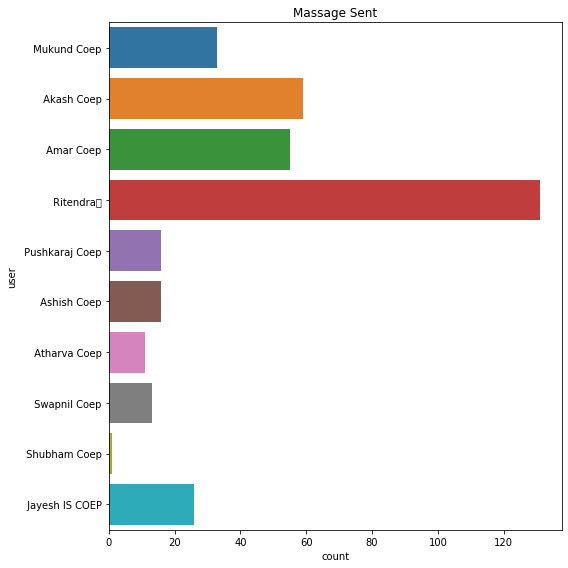

In [16]:
plt.figure(figsize=(8,8))
sns.countplot(y=chat['user'],orient='h')
plt.title('Massage Sent')
plt.tight_layout()

In [17]:
#Dtae statistics
date = pd.DataFrame([chat['date'].value_counts().index,chat['date'].value_counts().values],index=['Date','Time'])
date = date.transpose()

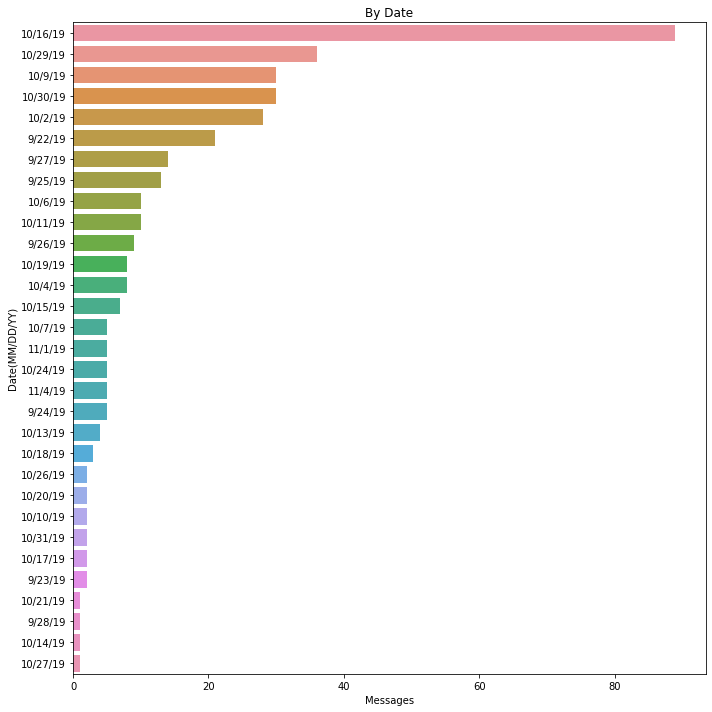

In [18]:
plt.figure(figsize=(10,10))
sns.barplot(y=date['Date'],x=date['Time'])
plt.title('By Date')
plt.xlabel('Messages')
plt.ylabel('Date(MM/DD/YY)')
plt.tight_layout()

In [19]:
chat['Time'].iloc[0].split()[0][0] +' '+ chat['Time'].iloc[0].split()[1][:2]

'8 AM'

In [20]:
chat['Time'] = chat['Time'].apply(lambda x: (x.split()[0][0] +' '+ x.split()[1][:2]))

In [21]:
Time = pd.DataFrame([chat['Time'].value_counts().index,chat['Time'].value_counts().values],index=['time','Msg'])
Time = Time.transpose()


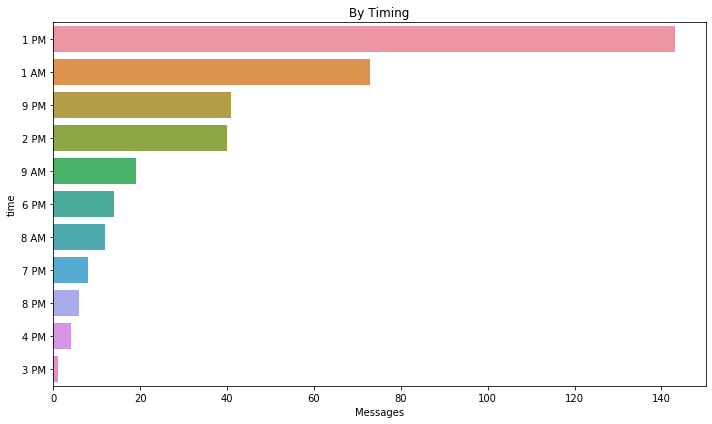

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(y=Time['time'],x=Time['Msg'])
plt.title('By Timing')
plt.xlabel('Messages')
plt.ylabel('time')
plt.tight_layout()

In [23]:
from nltk.corpus import stopwords 
stop = set(stopwords.words('english'))
def stopword(text):
    flag=0
    for i in text.lower().split():
        if i in stop:
            flag = 1
    if flag==1:
        return 'present'
    else:
        return 'absent'

In [24]:
chat['Stopwords']=chat['Updated_msg'].apply(lambda x:stopword(x))

In [25]:
def non_stopword(text):
    word=[]
    for i in text.lower().split():
        if i not in stop and i != ' ':
            if len(i)<=4:
                word.append(i)
                break
    return ''.join(word)

In [26]:
chat['Updated_msg'].apply(lambda x:non_stopword(x)).value_counts()

        104
face     56
haa       8
bhai      7
nhi       7
       ... 
use       1
mind      1
yap       1
site      1
hi        1
Name: Updated_msg, Length: 135, dtype: int64

In [27]:
non_stop = pd.DataFrame([chat['Updated_msg'].apply(lambda x:non_stopword(x)).value_counts().index,chat['Updated_msg'].apply(lambda x:non_stopword(x)).value_counts().values],index=['words','count'])

In [28]:
non_stop = non_stop.transpose()[1:10]

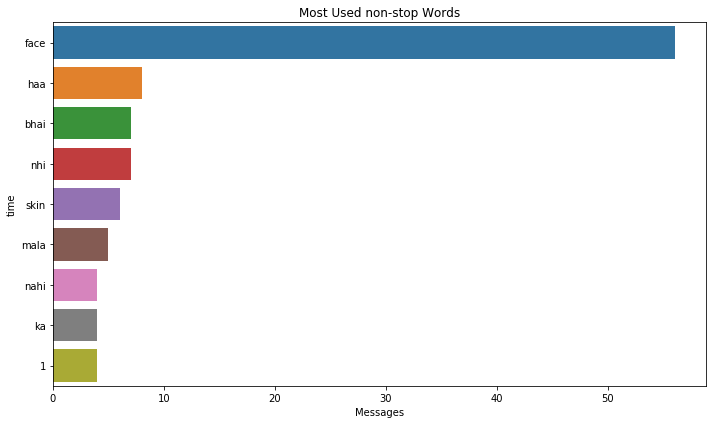

In [29]:
plt.figure(figsize=(10,6))
sns.barplot(y=non_stop['words'],x=non_stop['count'])
plt.title('Most Used non-stop Words')
plt.xlabel('Messages')
plt.ylabel('time')
plt.tight_layout()

/root/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 128578 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/root/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 128578 missing from current font.
  font.set_text(s, 0, flags=flags)


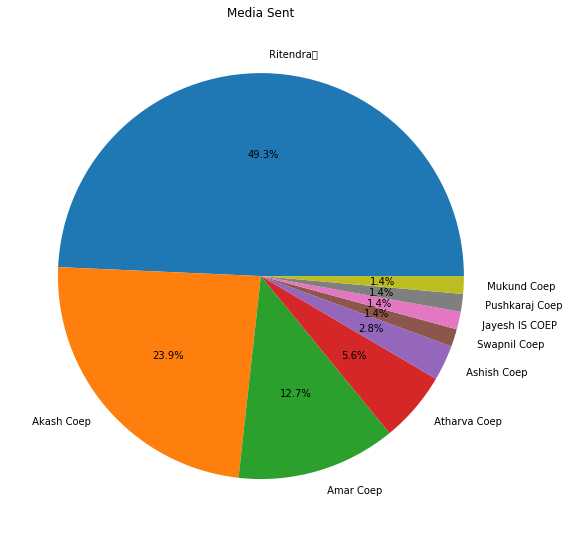

In [30]:
media_sent = chat[chat['Updated_msg'].apply(lambda x:str(x) in ' <Media omitted>')]['user'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(media_sent.values,labels=media_sent.index,autopct='%1.1f%%')
plt.title('Media Sent')
plt.tight_layout()

In [31]:
media_sent

 Ritendra🙂         35
 Akash Coep        17
 Amar Coep          9
 Atharva Coep       4
 Ashish Coep        2
 Swapnil Coep       1
 Jayesh IS COEP     1
 Pushkaraj Coep     1
 Mukund Coep        1
Name: user, dtype: int64

In [32]:
chat['Updated_msg'].apply(lambda x:non_stopword(x)).value_counts()

        104
face     56
haa       8
bhai      7
nhi       7
       ... 
use       1
mind      1
yap       1
site      1
hi        1
Name: Updated_msg, Length: 135, dtype: int64

In [33]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

4.6.0


In [34]:
import cufflinks as cf

In [35]:
# For Notebooks
init_notebook_mode(connected=True)

In [36]:
# For offline use
cf.go_offline()

In [37]:
date.iplot(kind='bar',y='Time',x='Date',bins=25,orientation='h',title='By Date')

In [38]:
date.iplot(kind='bar',y='Time',x='Date',bins=25,orientation='h',title='By Date')